In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
import random
import keras
from keras import layers

## Classe de chargement de données

In [2]:
class Load_mnist:
    
    def __init__(self, normalized=False, shuffled=False, random_state=None):
        (self.X_train, self.y_train), (self.X_test, self.y_test) = keras.datasets.mnist.load_data()
        self.X_train = self.X_train.astype('float32')
        self.X_test = self.X_test.astype('float32')
        self.y_train = self.y_train.astype('float32')
        self.y_test = self.y_test.astype('float32')
        
        self.normalized = normalized
        self.shuffled = shuffled
        if self.normalized:
            self.normalize()
        if self.shuffled:
            self.shuffle(random_state=random_state)
        
    def normalize(self):
        self.X_train = self.X_train / 255
        self.X_test = self.X_test / 255
        self.normalized = True
        
    def shuffle(self, random_state=None):
        self.X_train, self.y_train = self.unison_shuffled_copies(self.X_train, self.y_train, random_state=random_state)
        self.X_test, self.y_test = self.unison_shuffled_copies(self.X_test, self.y_test, random_state=random_state)
        self.shuffled = True
        
    def show_number(self, number=None, set_='train'):
        if set_ == 'train':
            X = self.X_train.copy()
            y = self.y_train.copy()
        elif set_ == 'test':
            X = self.X_test.copy()
            y = self.y_test.copy()
            
        if number is None:
            number = np.random.randint(0, 10)

        plt.figure()
        mask = y == number
        image = random.choice(X[mask])
        plt.imshow(image, cmap='gray')
        
    def get_datas(self):
        return self.X_train, self.X_test, self.y_train, self.y_test
        
    def __repr__(self):
        return f"""Data_mnist(shapes=(X_train: {self.X_train.shape}
                    y_train: {self.y_train.shape}
                    X_test: {self.X_test.shape}
                    y_test: {self.y_test.shape}),
        normalized={self.normalized}, shuffled={self.shuffled}) object"""
    
    @staticmethod
    def unison_shuffled_copies(a, b, random_state=None):
        if random_state is not None:
            np.random.seed(random_state)
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]
    
    @staticmethod
    def split(X, y, val_size=0.2):
        m = int(X.shape[0]*val_size)
        X_train, X_val = X[:-m], X[-m:]
        y_train, y_val = y[:-m], y[-m:]
        
        return X_train, X_val, y_train, y_val

## Chargement des données

In [3]:
data_obj = Load_mnist(normalized=True, shuffled=True, random_state=0)
data_obj

Data_mnist(shapes=(X_train: (60000, 28, 28)
                    y_train: (60000,)
                    X_test: (10000, 28, 28)
                    y_test: (10000,)),
        normalized=True, shuffled=True) object

In [4]:
X_train, X_test, y_train, y_test = data_obj.get_datas()

## Préparation des données

In [5]:
num_classes = len(np.unique(y_train))
input_shape = (28, 28, 1)

# Assure que les données d'entrée sont de taille 28x28
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# OneHot sur les y
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Exemple donnée

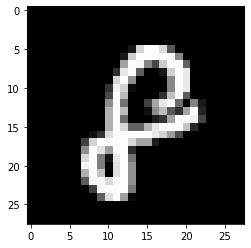

In [6]:
data_obj.show_number(8)

## Construction du modèle

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [8]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 30s 71ms/step - loss: 0.3726 - accuracy: 0.8888 - val_loss: 0.1030 - val_accuracy: 0.9685
Epoch 2/15
422/422 [==============================] - 33s 78ms/step - loss: 0.1163 - accuracy: 0.9651 - val_loss: 0.0726 - val_accuracy: 0.9780
Epoch 3/15
422/422 [==============================] - 30s 72ms/step - loss: 0.0868 - accuracy: 0.9732 - val_loss: 0.0541 - val_accuracy: 0.9840
Epoch 4/15
422/422 [==============================] - 30s 71ms/step - loss: 0.0727 - accuracy: 0.9768 - val_loss: 0.0497 - val_accuracy: 0.9855
Epoch 5/15
422/422 [==============================] - 30s 71ms/step - loss: 0.0642 - accuracy: 0.9798 - val_loss: 0.0457 - val_accuracy: 0.9868
Epoch 6/15
422/422 [==============================] - 30s 71ms/step - loss: 0.0563 - accuracy: 0.9829 - val_loss: 0.0432 - val_accuracy: 0.9880
Epoch 7/15
422/422 [==============================] - 30s 71ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0405 - val_accuracy:

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.028662484139204025
Test accuracy: 0.9902999997138977


In [11]:
model.save(r'C:\Users\Hany\Desktop\Cours_Python\Reconnaissance_chiffre\model_mnist.h5')